## Разработка стратегии взаимодействия с пользователями сети фитнес-центров «Культурист-датасаентист»

Цель исследования: снижение оттока клиентов

Задачи исследования:
1. Выделение целевых групп клиентов;
2. Разработка мер по снижению оттока клиентов;
3. Выделение особенностей взаимодействия с клиентами.

## План проекта

1.	Загрузка данных 
2.  Анализ данных 
3.	Модель прогнозирования оттока пользователей 
4.	Анализ информации 
5.	Выводы 

## 1. Загрузка данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
fit_centr = pd.read_csv('/datasets/gym_churn.csv')
print(fit_centr.shape)
fit_centr.head()

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [2]:
fit_centr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [3]:
print(fit_centr.duplicated().sum())# проверка на дубли

0


Выводы 

Данные загружены. Выведена информация о данных. Выведен размер массиа данных. Выведены первые 5 значений переменных. В данных нет пропусков, об этом свидетельствует количество значений в переменных. В данных нет дубликатов (выполнена проверка). 

## 2. Анализ данных 

### Расчет средних значений и стандартных отклонений переменных 

In [4]:
fit_centr.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Построим таблицу основных характеристик массива данных. Среднее значение переменной gender (пол) - 0,51, что говорит о почти равном распределении клиентов на мужчин и женщин. Среднее значение переменной Near_Location - 0,84, т.е. большинство клиентов живут рядом с фитнес центром. Средняя переменной Partner  равна 0,487: почти половина клиентов - работники предприятий-партнеров центра. А вот активные друзья есть только у 30,8% клиентов, исходя из среднего значения  переменной Promo_friends. Средняя длительность договора и среднее время до окончания договора небольшие - 4,68 мес. и 4,2 мес., однако следует обратить внимание на высокие значения СКО (почти равные средним), которые свидетельствует о существенном разбросе данных. Тоже самое можно сказать о показателе Lifetime (ремя с момента первого обращения). Групповые визиты посещают 41,2% клиентов. Средний возраст клиентов - 29 лет. Средняя суммарная выручка от прочих услуг - 146,9 (трудно сказать это много или мало, не зная динамики показателя). Среднее количество посещений в неделю на 1 клиента за весь период посещения - 1,9; среднее количество посещений в неделю на 1 клиента за последний месяц - 1,8. Отток клиентов в текущем месяце - 26,5%.

Кроме того, как видно из таблицы, переменные имеют разную размерность и разный разброс. Для того, чтобы дисперсия и размерность переменных не оказывали влияния на результаты анализа, перед его проведением стандартизируем данные.

### Расчет средних значений признаков в двух группах 

In [5]:
churn_stay = fit_centr.groupby('Churn').mean()
churn_stay

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Рассчитаем средние значения переменных в зависимости от значения признака churn (отток). Как видно из получившейся таблицы, значения переменных gender (пол) и Phone в зависимости от факта оттока не отличаются. В остальном клиенты, покидающие фитнес-центр отличаются тех, кто остается: они в среднем дальше живут, реже являются сотрудниками компаний-партнеров, их реже "приводят друзья", длительность текущего абонемента и время до его окончания у них короче, реже посещают групповые занятия, меньше тратят и реже посещают фитнес-центр.   

In [6]:
churn_date = fit_centr.query('Churn == 1')
churn_date = churn_date.drop('Churn', axis = 1)
churn_date.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101


In [7]:
stay_date = fit_centr.query('Churn == 0')
stay_date = stay_date.drop('Churn', axis = 1)
stay_date.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078


### Распределение признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

Гистограммы распределения клиентов, покинувших фитнес-центр и оставшихся


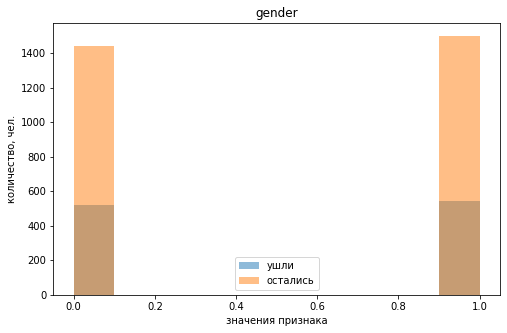

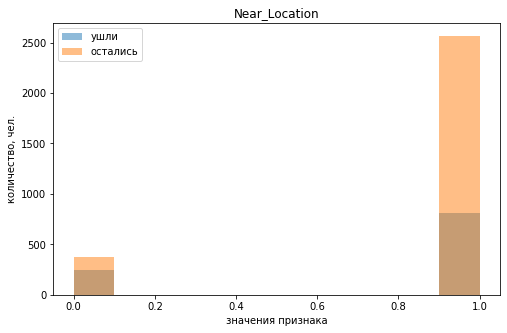

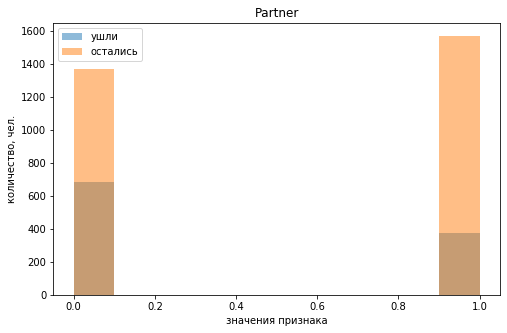

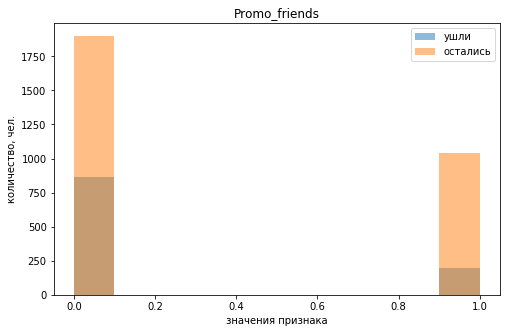

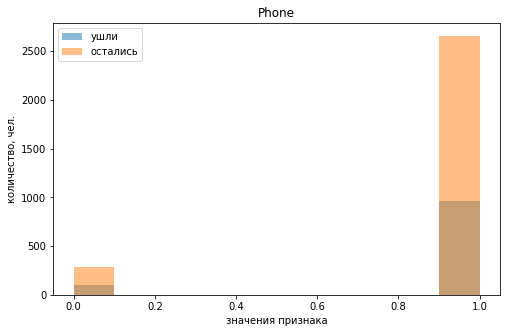

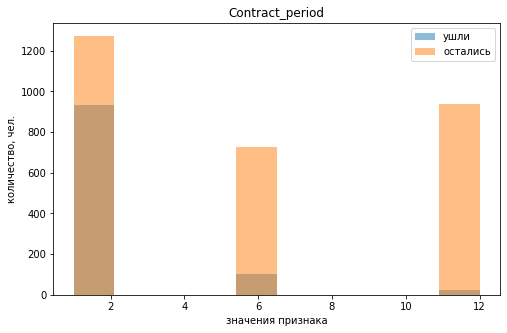

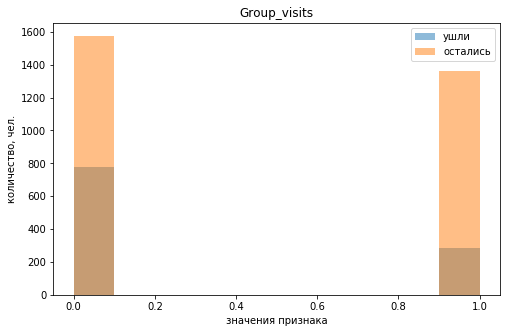

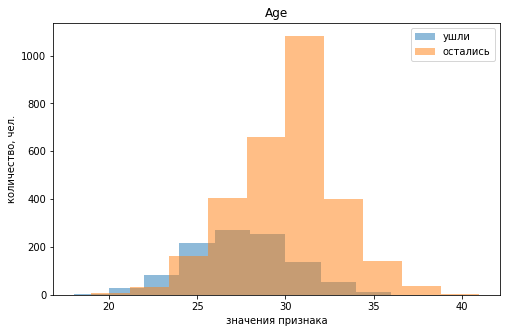

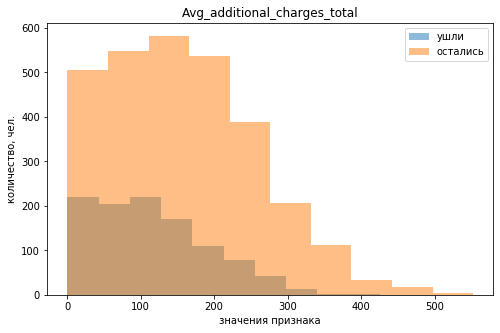

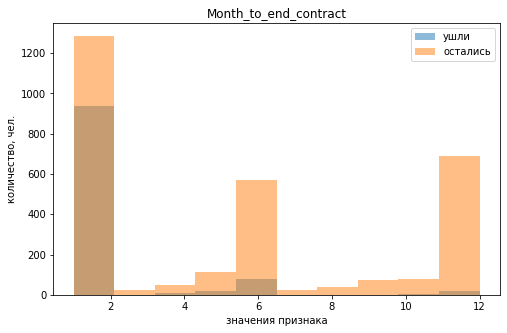

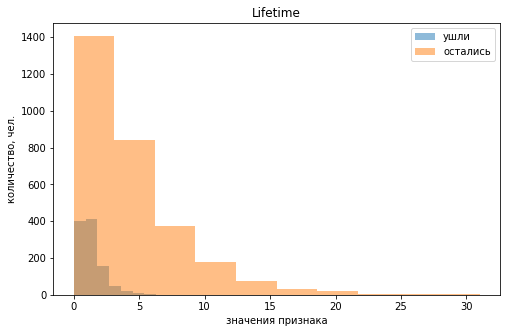

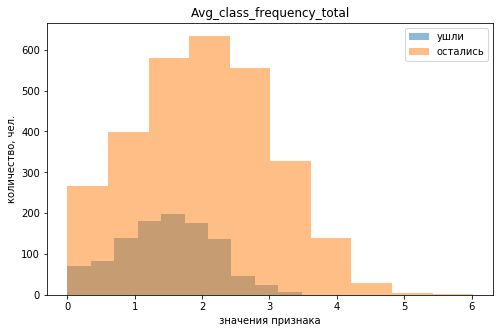

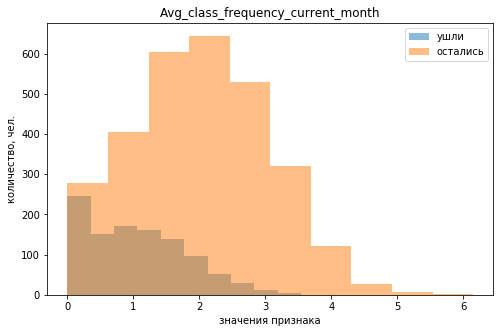

In [8]:
lgd = ['ушли', 'остались']
print('Гистограммы распределения клиентов, покинувших фитнес-центр и оставшихся')
for i in churn_date.columns:
    ax=plt.subplot()
    churn_date[i].plot.hist(bins=10, figsize = (8, 5), title = i, alpha = 0.5)
    stay_date[i].plot.hist(bins=10, figsize = (8, 5), title = i, alpha = 0.5);
    ax.legend(lgd)
    plt.xlabel("значения признака")
    plt.ylabel("количество, чел.");
    plt.show()

Построим гистограммы распределения признаков для тех клиентов, кто ушёл (отток) и тех, кто остался. Как видно из графиков, подтверждаются выводы, сделанные ранее по средним значениям.
Пропорции распределений переменных gender (пол) и Phone (контактный телефон) в зависимости от факта оттока не отличаются.
Среди тех, кто остался пропорция живущих рядом с фитнес центром выше, чем среди тех, кто ушел.
Аналогичная ситуация с теми, кого привели друзья, а также с посещением групповых занятий.
Тех, кто является сотрудниками компаний-партнеров среди оставшихся больше, а среди тех, кто ушел, меньше, чем обычных клиентов.
Длительность действующего договора у ушедших, в основном, от 0 до 2 месяцев, тогда как у остающихся - от 6 до 12 мес.
Распределения ушедших и оставшихся клиентов по возрасту - нормальные, но оставшиеся, в среднем, старше ушедших.
Распределения ушедших и оставшихся клиентов по прочим расходам - нормальные, но оставшиеся, в среднем, тратили больше ушедших.
Месяцев до конца договора у ушедших оставалось, в основном от 0 до 2, у оставшихся - от 3 до 12.
Время с момента первого обращения в фитнес-центр у ушедших составляло, в основоном до 2 месяцев, у оставшихся - до полугода.
Количество посещений в неделю за весь период посещения у обеих групп распределено нормально, но оставшиеся посещали фитнес-центр чаще ушедших.
Аналогичная ситуация с количеством посещений в неделю за последни месяц: значения у обеих групп распределены нормально, но у ушедших - распределение со смещением влево. Оставшиеся посещали фитнес-центр чаще ушедших.

### Матрица корреляций

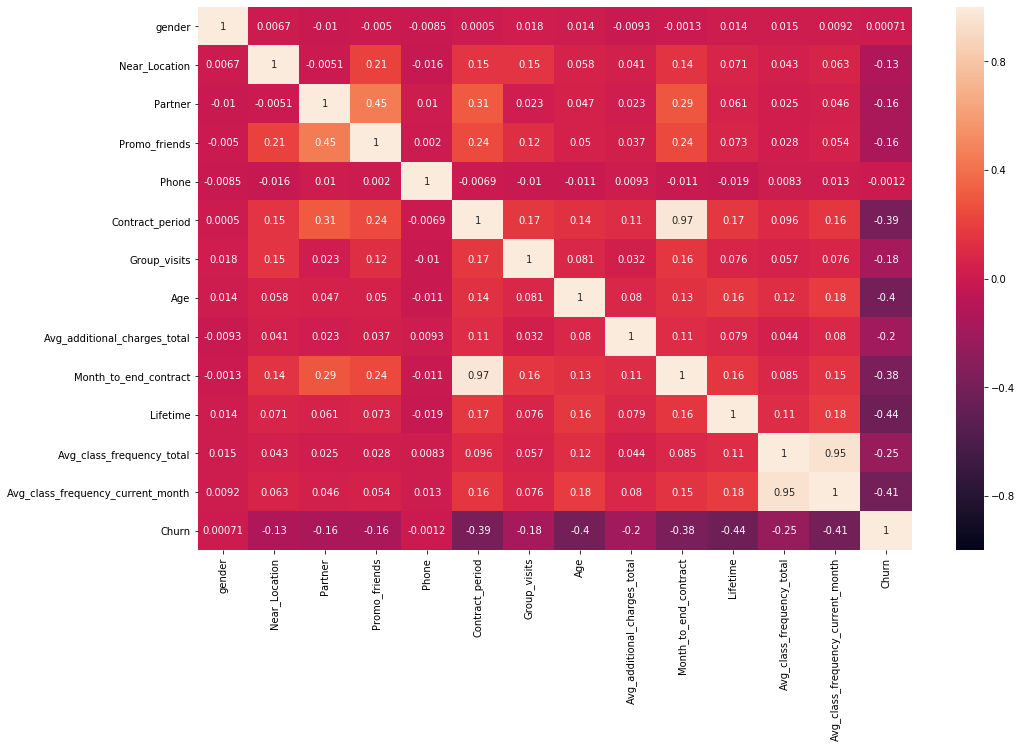

In [9]:
cm = fit_centr.corr()
plt.figure(figsize=(16, 10))#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, linecolor='black', vmin = - 1, vmax = 1);
plt.show()

Построим матрицу корреляций между переменными массива данных. Наша результирующая переменная - Churn (отток), поэтому, в первую очередь, будем смотреть на ее взаимодействие с другими переменными: сильной связи у переменной churn нет ни с одной из остальных переменных. Есть средняя по тесноте обратная связь с переменными Contract_period, Age, Month_to_end_contract, Lifetime и Avg_class_frequency_current_month (от -0,39 до -0,44).
Кроме того следует отметить переменные, которые связаны между собой очень сильно: это Contract_period и Month_to_end_contract (0.97), а также Avg_class_frequency_current_month и Avg_class_frequency_total (0.95). При проведении кластерного анализа нужно будет удалить по одной переменной из каждой указанной пары, чтобы не исказить результаты.

## 3. Модель прогнозирования оттока пользователей

### Модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце

In [10]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = fit_centr.drop('Churn', axis = 1)
y = fit_centr['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

# задаем список моделей
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(accuracy_score(y_test, y_pred), 
                                                                   precision_score(y_test, y_pred),
                                                                   recall_score(y_test, y_pred)))

#вывод метрики по списку моделей
for i in models:
    warnings.filterwarnings("ignore")
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy:0.93 Precision:0.89 Recall:0.84 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy:0.92 Precision:0.89 Recall:0.79 


Построим модели бинарной классификации пользователей. Используем модели логистической регрессиии и случайный лес.
Для оценки моделей используем метрики accuracy (доля правильных ответов), precision (точность) и recall (полнота).
Обе модели показали хорошие результаты метрик, близкие к 1.
Исходя из полученных значений, модель логистической регрессии показала лучшие результаты.

## 4. Кластеризация пользователей

### Расчет матрицы расстояний функцией linkage() на стандартизованной матрице признаков

In [11]:
X = fit_centr.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month', 'Churn'], axis = 1)
X.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884


Удаляем столбцы 'Month_to_end_contract', 'Avg_class_frequency_current_month' и 'Churn' из массива данных, чтобы не искажать результаты. Указанные переменные имели очень сильную взаимозависимость с переменными Contract_period и Avg_class_frequency_total.


In [12]:
# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
linked = linkage(X_sc, method = 'ward')
linked

array([[7.13000000e+02, 2.03300000e+03, 1.27048836e-02, 2.00000000e+00],
       [7.93000000e+02, 3.20500000e+03, 5.90387919e-02, 2.00000000e+00],
       [7.50000000e+01, 1.64600000e+03, 6.49761006e-02, 2.00000000e+00],
       ...,
       [7.98500000e+03, 7.99500000e+03, 8.41193602e+01, 2.57000000e+03],
       [7.98600000e+03, 7.99600000e+03, 8.97620484e+01, 2.95600000e+03],
       [7.99200000e+03, 7.99700000e+03, 9.53923405e+01, 4.00000000e+03]])

Стандартизируем данные и построим матрицу расстояний.

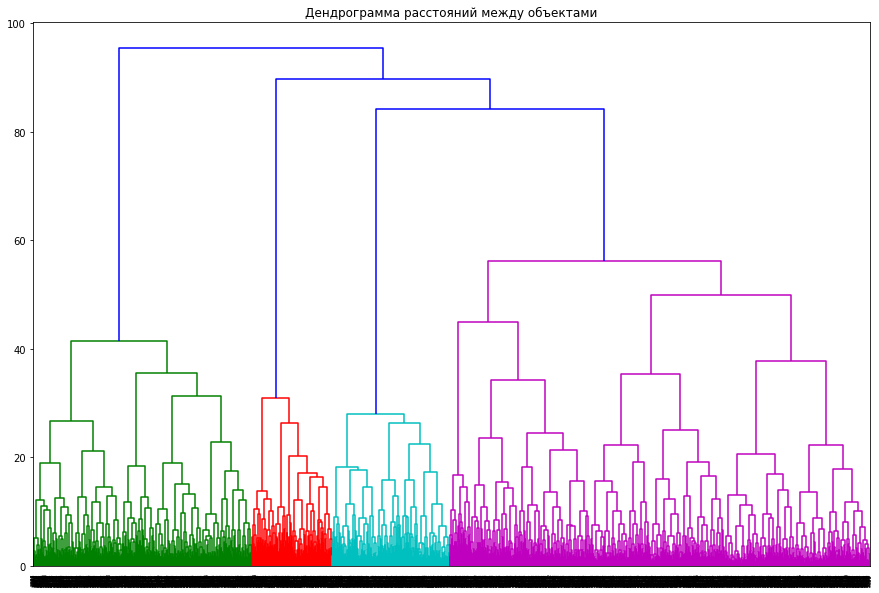

In [13]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма расстояний между объектами')
plt.show() 

Построим дендрограмму расстояний между объектами (клиентами). Как видно, все клиенты были разделены на 5 групп.

### Модель кластеризации на основании алгоритма K-Means

In [14]:
km = KMeans(n_clusters = 5,random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc)
labels

array([4, 3, 2, ..., 1, 1, 4], dtype=int32)

In [15]:
fit_centr['cluster'] = labels
fit_centr.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
1272,0,1,0,0,1,12,1,29,101.907726,12.0,2,2.405442,2.596044,0,3
520,0,1,0,0,1,1,0,27,115.800883,1.0,1,1.029153,0.000000,1,2
3964,0,1,0,0,1,1,1,25,45.809262,1.0,0,1.580621,1.589151,1,3
3620,1,1,0,1,1,12,1,33,97.537552,12.0,0,4.034458,4.005641,0,1
363,1,1,1,0,1,12,1,28,401.721082,12.0,3,1.994282,1.815133,0,3
1599,0,1,0,1,1,6,0,35,194.837133,5.0,13,1.094371,1.180329,0,1
317,0,1,0,0,1,1,0,28,109.492524,1.0,1,1.825685,1.869340,0,2
3945,0,1,0,0,1,1,0,31,139.665266,1.0,0,1.162560,1.001496,1,2
3249,1,1,0,0,1,1,1,34,5.268790,1.0,6,2.888744,2.896801,0,3
904,1,1,0,0,1,6,1,27,204.408967,6.0,1,2.315784,2.158059,1,3


Определим индексы кластеров для клиентов. Присоединим индексы к исходной таблице.

### Средние значения признаков для кластеров

In [16]:
fc_mean =fit_centr.groupby('cluster').mean()
fc_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,2.853832,3.060606,1.770413,1.606619,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,6.988571,4.380952,1.978963,1.933736,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,2.650177,3.343640,1.800647,1.645965,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,4.165327,3.761194,1.941342,1.845911,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


Рассчитаем средние значения переменных по каждому кластеру.
Как видно из получившейся таблицы, в двух кластерах (0 и 2)наблюдается высокий процент ухода из фитнес-центра.У указанных групп много одинаковых характеристик: возраст - около 29 лет, низкий уровень приглашений друзей, короткий период договора и срок до конца договора, самые низкие показатели посещения занятий. При этом у групп есть и различия: для одной группы характерно удаленное от фитнес-центра проживание, для другой - полное отсутствие посещений групповых занятий (т.к. групповые занятия проводятся обычно в определенное время, можно сделать выводы, что клиенты, не имеющие воззможности их посещать, - слишком заняты на работе). 
Таким образом, первую из указанных групп можно назвать "Живущие вдали" (кл. 0), вторую - "Трудоголики" (кл. 2).
Вместе с тем, в таблице присутствуют группа, в которых напротив сконцентрированы клиенты, ориентированные на приверженность фитнес-центру (кл. 1). У указанной группы самые низкие показатели оттока, самая высокая посещаемость, самая длительная продолжительность занятий, самый долгий период договора, самые высокие прочие расходы, возраст - около 30 лет, также почти все они живут близко к фитнес-центру. Также они, в основном, являются сотрудниками предприятий-партнеров центра, а также их в фитнес-центр приводят друзья, что, как правило дает право на скидку. Эту группу можно назвать "Практичные спортсмены".
Еще две группы занимают промежуточное положение между ушедшими и приверженцами.
Одна из них по характеристикам похожа на группу "Практичные спортсмены" (возраст, частое посещение центра), но при этом отличается более короткими сроками  договоров, 100% из них посещают групповые занятия, а также клиенты из указанного кластера редко вляются сотрудниками предприятий-партнеров и их редко приглашают в клуб друзья, т.е. в основном они приходят сами. Назовем эту группу "Фанаты спорта" (кл. 3).
Еще одна группа обладает промежуточными характеристиками между вышеперечисленными группами, единственное, что ее ярко выделяет среди других групп - это нежелание оставлять контактные данные. Назовем эту группу "Недоверчивые" (кл. 4).

### Распределение признаков для кластеров.

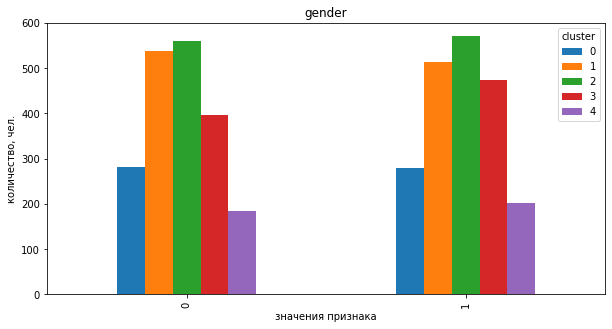

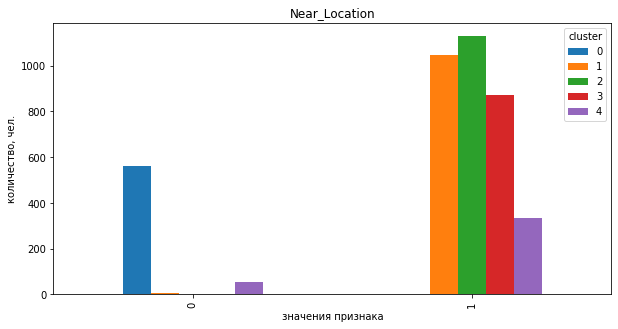

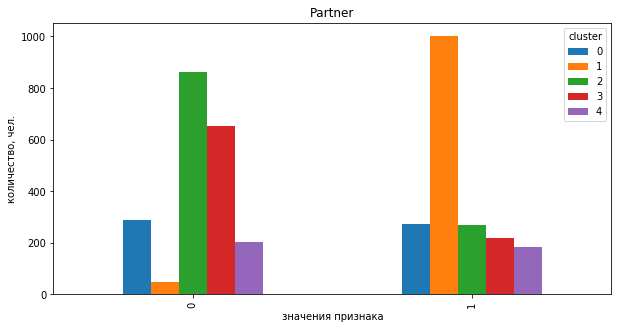

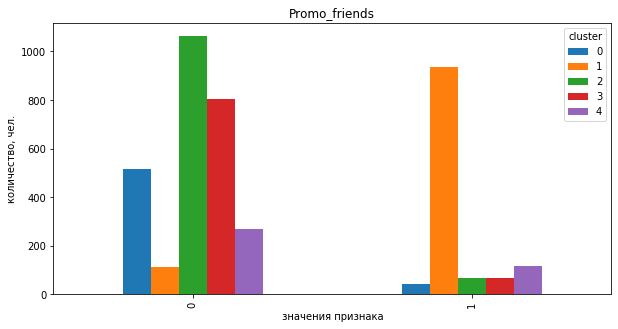

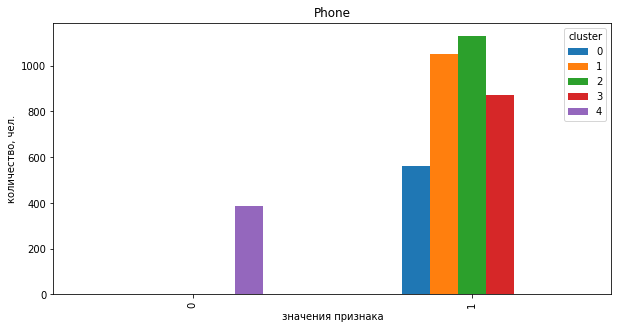

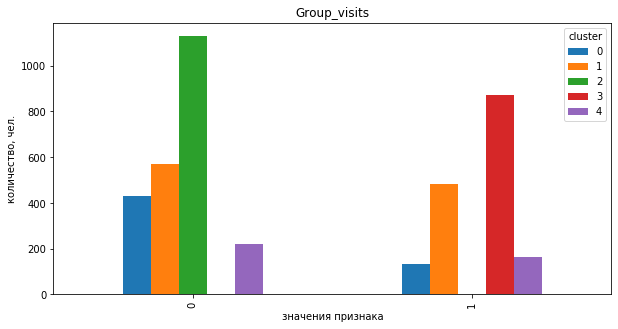

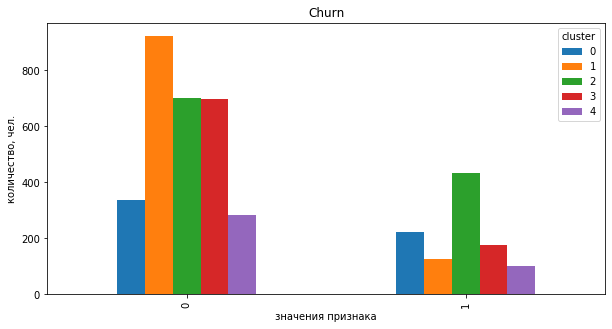

In [17]:
import warnings
list_1 = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
list_2 = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
for i in list_1:
    cl = fit_centr.pivot_table(index=i, columns= 'cluster', values='Age', aggfunc='count')
    cl.plot(kind='bar', figsize=(10, 5), title = i)       
    ax.legend(fit_centr['cluster'].unique())
    plt.xlabel("значения признака")
    plt.ylabel("количество, чел.");
    plt.show()

Contract_period


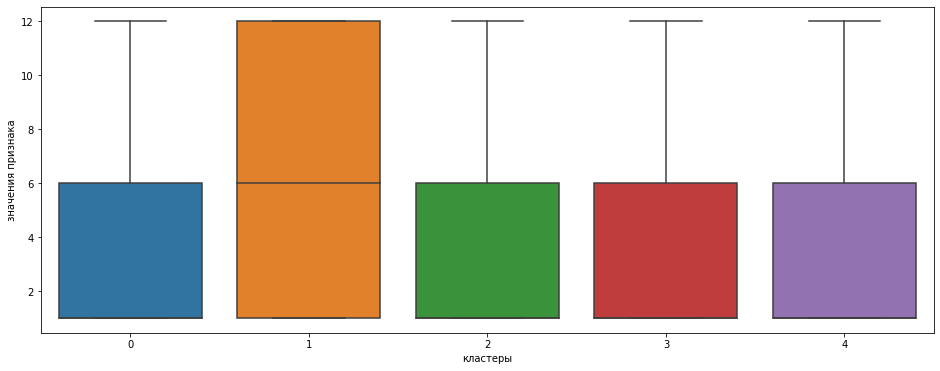

Age


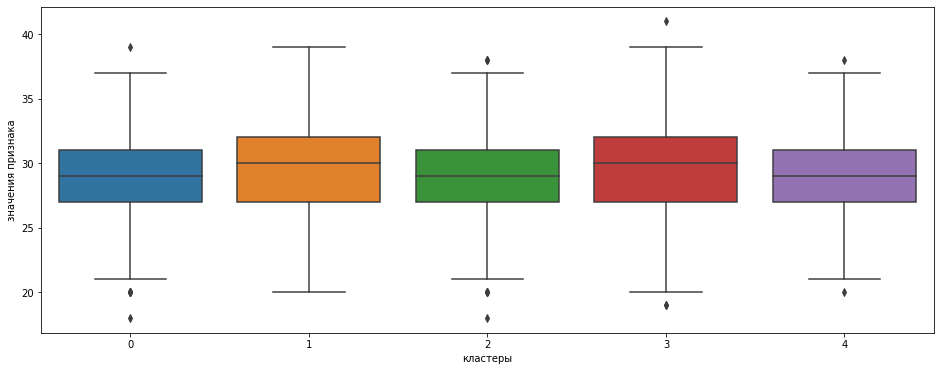

Avg_additional_charges_total


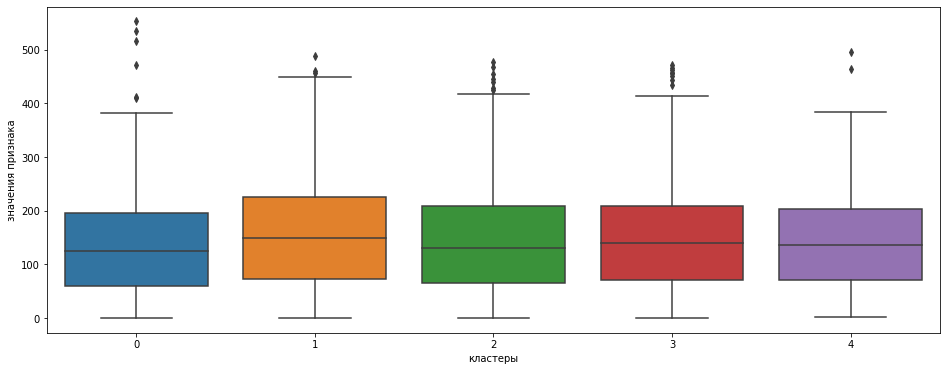

Month_to_end_contract


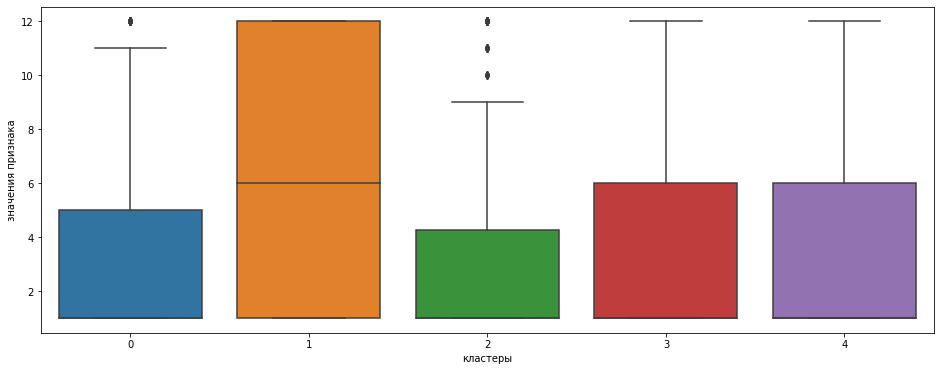

Lifetime


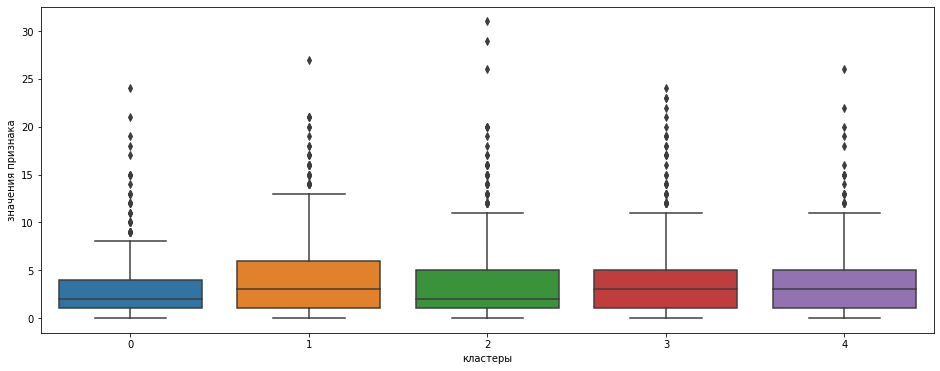

Avg_class_frequency_total


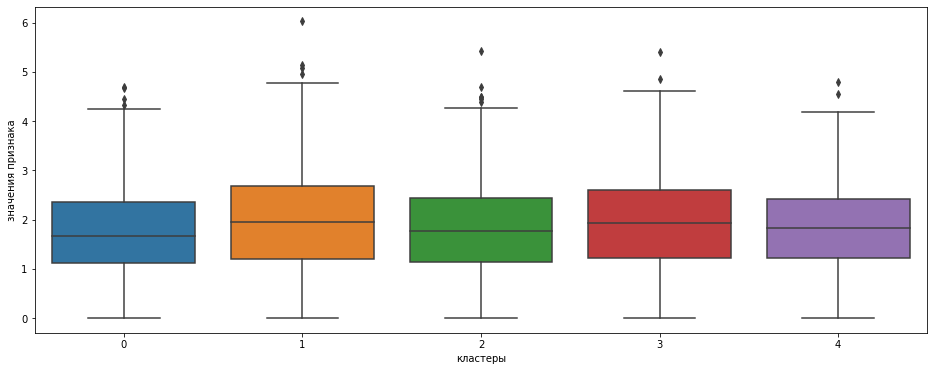

Avg_class_frequency_current_month


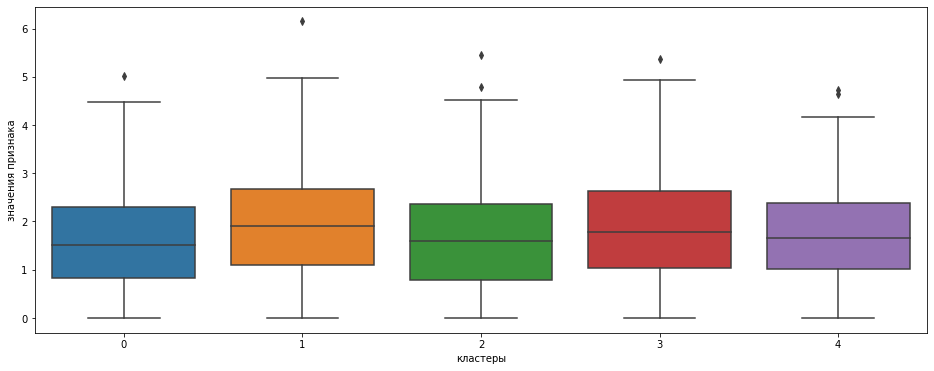

In [18]:
for i in list_2:
    print(i)
    plt.figure(figsize=(16, 6))
    sns.boxplot(x='cluster', y=i, data=fit_centr)
    plt.xlabel("кластеры")
    plt.ylabel("значения признака")
    plt.show()

Построим графики распределения значений внутри кластеров.
Учитывая, что при каждом перерасчете номера кластеров меняются, будем использовать ранее данные кластерам наименования:
Трудоголики;
Фанаты спорта; 
Практичные спортсмены;
Живущие вдали;
Недоверчивые.

Из графика gender (пол) видно, что распределение по полу в кластерах практически одинаково.
График Near_Location (близкое расположение) указывает на то, что в кластере "Живущие вдали" собраны клиенты, проживающие удаленно, в остальных кластерах клиенты живут близко.
На графиках Partner и Promo_friends выделяются 3 группы: "Фанаты спорта" и "Трудоголики", где большинство не являются работниками партнера клуба и пришли сами (а не через друзей), и "Практичные спортсмены", где обратная ситуация.
На графике Phone выделяется группа "Недоверчивые", клиенты которой не оставляют сотовых телефонов для связи.
На графике Group_visits выделяются группы "Трудоголики", которые не посещают групповые занятия, и "Фанаты спорта", которые посещают их в полном составе.
На графике Churn выделяется группы "Практичные спортсмены", где самый низкий процент оттока, а также "Трудоголики" и "Живущие вдали", где показатели оттока самые высокие.
На графиках Contract_period и Month_to_end_contract выделяется кластер "Практичные спортсмены", у клиентов этого кластера максимальная длительность договоров.
На графике Age (возраст) выделяются клиенты кластеров "Практичные спортсмены" и "Фанаты спорта": они немного старше клиентов остальных кластеров. "Фанаты" и "Практичные", аналогичная ситуация наблюдается на графиках  Avg_class_frequency_total (среднее посещение в неделю) и Avg_class_frequency_current_month (среднее посещение в неделю в последний месяц).
График Avg_additional_charges_total (прочие расходы) показывает, что по данному показателю кластеры почти не отличаются, немого выделяется кластер "Практичные спортсмены". Аналогичная ситуация наблюдается в графике Lifetime.

Подтвердились выводы, полученные при расчете средних значений по кластерам: существует один кластер, в котором сконцентрировались постоянные клиенты, два кластера, в которых собрались клиенты, склонные к уходу и два кластера занимающих промежуточную позицию.

### Расчет для каждого полученного кластера доли оттока

In [19]:
churn_share = fit_centr.groupby('cluster')['Churn'].sum()/fit_centr.groupby('cluster')['Churn'].count()*100
churn_share

cluster
0    39.928699
1    12.095238
2    38.162544
3    20.091848
4    26.683938
Name: Churn, dtype: float64

Рассчитаем долю оттока для каждого кластера. Самый высокий процент оттока (39,9%) у "Живущих вдали", на втором месте- "Трудоголики" (38,2%), на третьем - "Недоверчивые" (26,7%), на четвертом - "Фанаты спорта" (20,1%), на последнем - "Практичные спортсмены" (12,1%).

## 5. Выводы

1. Средний возраст клиентов - 29 лет. Среднее количество посещений в неделю на 1 клиента за весь период посещения - 1,9; среднее количество посещений в неделю на 1 клиента за последний месяц - 1,8. Отток клиентов в текущем месяце - 26,5%.
2. Клиенты, покидающие фитнес-центр отличаются тех, кто остается: они в среднем дальше живут, реже являются сотрудниками компаний-партнеров, их реже "приводят друзья", длительность текущего абонемента и время до его окончания у них короче, реже посещают групповые занятия, меньше тратят и реже посещают фитнес-центр.
3. У переменной Churn нет сильной связи ни с одной из остальных переменных. Есть средняя по тесноте обратная связь с переменными Contract_period, Age, Month_to_end_contract, Lifetime и Avg_class_frequency_current_month (от -0,39 до -0,44).
4. Для классификации пользователей модель логистической регрессии на исходных данных показала лучшие результаты.
5. В ходе кластерного анализа были выделены 5 групп клиентов:
 - Трудоголики - слишком занятые, чтобы посещать групповые занятия;
 - Фанаты спорта - высокие характеристики посещения при низких характеристиках скидочных программ (спорт ради спорта); 
 - Практичные спортсмены - совмещение полезного и выгодного (высокие характеристики посещения, длительные договоры + участие в скидочных программах);
 - Живущие вдали - клиенты, живущие в других районах;
 - Недоверчивые - клиенты, не оставляющие о себе контактных данных.
6. Наиболее подверженные оттоку группы: Живущие вдали и Трудоголики; наименее подверженная оттоку группа - "Практичные спортсмены".

Рекомендации:

1. По группе "Живущие вдали" - имеет смысл рассмотреть возможность открыть фитнес-центр в районах проживания указанных клиентов. Для этого потребуется отдельное исследование.
2. По группе "Трудоголики": в целях их удержания (учитывая высокую занятость) можно организовать групповые занятия ближе к ночи, а также расширить время работы фитнес центра, например: с 6 утра до 2 ночи.
3. По кластеру "Недоверчивые" можно предложить им скидки на индивидуальные занятия с инструкторами, что позволит сильнее привязать их к фитнес-центру и расположить к доверию в ходе общения один на один, также их можно попытаться вовлечь вгрупповые занятия.
4. По кластеру "Фанаты спорта", учитывая, что они заключают договоры на короткий период, можно предложить им бесплатные индивидуальные занятия с инструкторами при продлении договора на более длительный период как постоянным клиентам.
5. По кластеру "Практичные спортсмены" можно предложить им скидки при каждом продлении договора, учитывая их практичность - должно сработать и процент оттока уменьшится.